# Churn Prediction - Case Study:


## Introduction:

Imagine  that  we  are  working  at  a  telecom  company  that  offers  phone  and  internet services,  and  we  have  a  problem:  some  of  our  customers  are  churning.  They  no  longer are  using  our  services  and  are  going  to  a  different  provider.  We  would  like  to  prevent that  from  happening,  so  we  develop  a  system  for  identifying  these  customers  and  offer them  an  incentive  to  stay.  We  want  to  target  them  with  promotional  messages  and  give them  a  discount.  We  also  would  like  to  understand  why  the  model  thinks  our  customers  churn,  and  for  that,  we  need  to  be  able  to  interpret  the  model’s  predictions. We  have  collected  a  dataset  where  we’ve  recorded  some  information  about  our customers:  what  type  of  services  they  used,  how  much  they  paid,  and  how  long  they stayed  with  us.  We  also  know  who  canceled  their  contracts  and  stopped  using  our  services  (churned).  We  will  use  this  information  as  the  target  variable  in  the  machine learning  model  and  predict  it  using  all  other  available  information.
******

### Project Outline:
1. First,  we  download  the  dataset  and  do  some  initial  preparation:  rename  columns  and  change  values  inside  columns  to  be  consistent  throughout  the  entire dataset.

2. Then  we  split  the  data  into  train,  validation,  and  test  so  we  can  validate  our models.

3. As  part  of  the  initial  data  analysis,  we  look  at  feature  importance  to  identify which  features  are  important  in  our  data.

4. We transform  categorical  variables  into  numeric  variables  so  we  can  use  them  in the  model.

5. Finally,  we  train  a  logistic  regression  model.
***

### Telco Churn Dataset:

The Dataset has the following  information:

- Services  of  the  customers:  phone;  multiple  lines;  internet;  tech  support  and  extra services  such  as  online  security,  backup,  device  protection,  and  TV  streaming.

- Account  information:  how  long  they  have  been  clients,  type  of  contract,  type  of payment  method.

- Charges:  how  much  the  client  was  charged  in  the  past  month  and  in  total.

- Demographic  information:  gender,  age,  and  whether  they  have  dependents  or a  partner.

- Churn:  yes/no,  whether  the  customer  left  the  company  within  the  past  month.
***

## Data Initialisation and Exploration:

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl

mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.grid'] = False
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['figure.dpi'] = 200

In [83]:
df = pd.read_csv('Telco.xls')
print(f'Dimension of the Dataset {df.shape}')
df.head()

Dimension of the Dataset (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [85]:
total_charges = pd.to_numeric(df['TotalCharges'], errors='coerce')

df[total_charges.isnull()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [86]:
# filling the missing values with 0

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],
                                errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [87]:
# making the letters uniform by lower casing each of the

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [88]:
df.rename(columns={
    'customerid':'customer_id',
    'seniorcitizen':'senior_citizen',
    'phoneservice':'phone_service',
    'multiplelines':'multiple_lines',
    'internetservice':'internet_service',
    'onlinesecurity':'online_security',
    'onlinebackup':'online_backup',
    'deviceprotection':'device_protection',
    'techsupport':'tech_support',
    'streamingtv':'streaming_tv',
    'streamingmovies':'streaming_movies',
    'paperlessbilling':'paperless_billing',
    'paymentmethod':'payment_method',
    'monthlycharges':'monthly_charges',
    'totalcharges':'total_charges'
}, inplace=True)
df.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Exploratory Data Analysis:

In [89]:
colors = ['#3bafda','#bf263c']
colors3 = ['#3bafda','#40826d','#f6bb42']
colors4 = ['#3bafda','#bf263c','#40826d','#f6bb42']

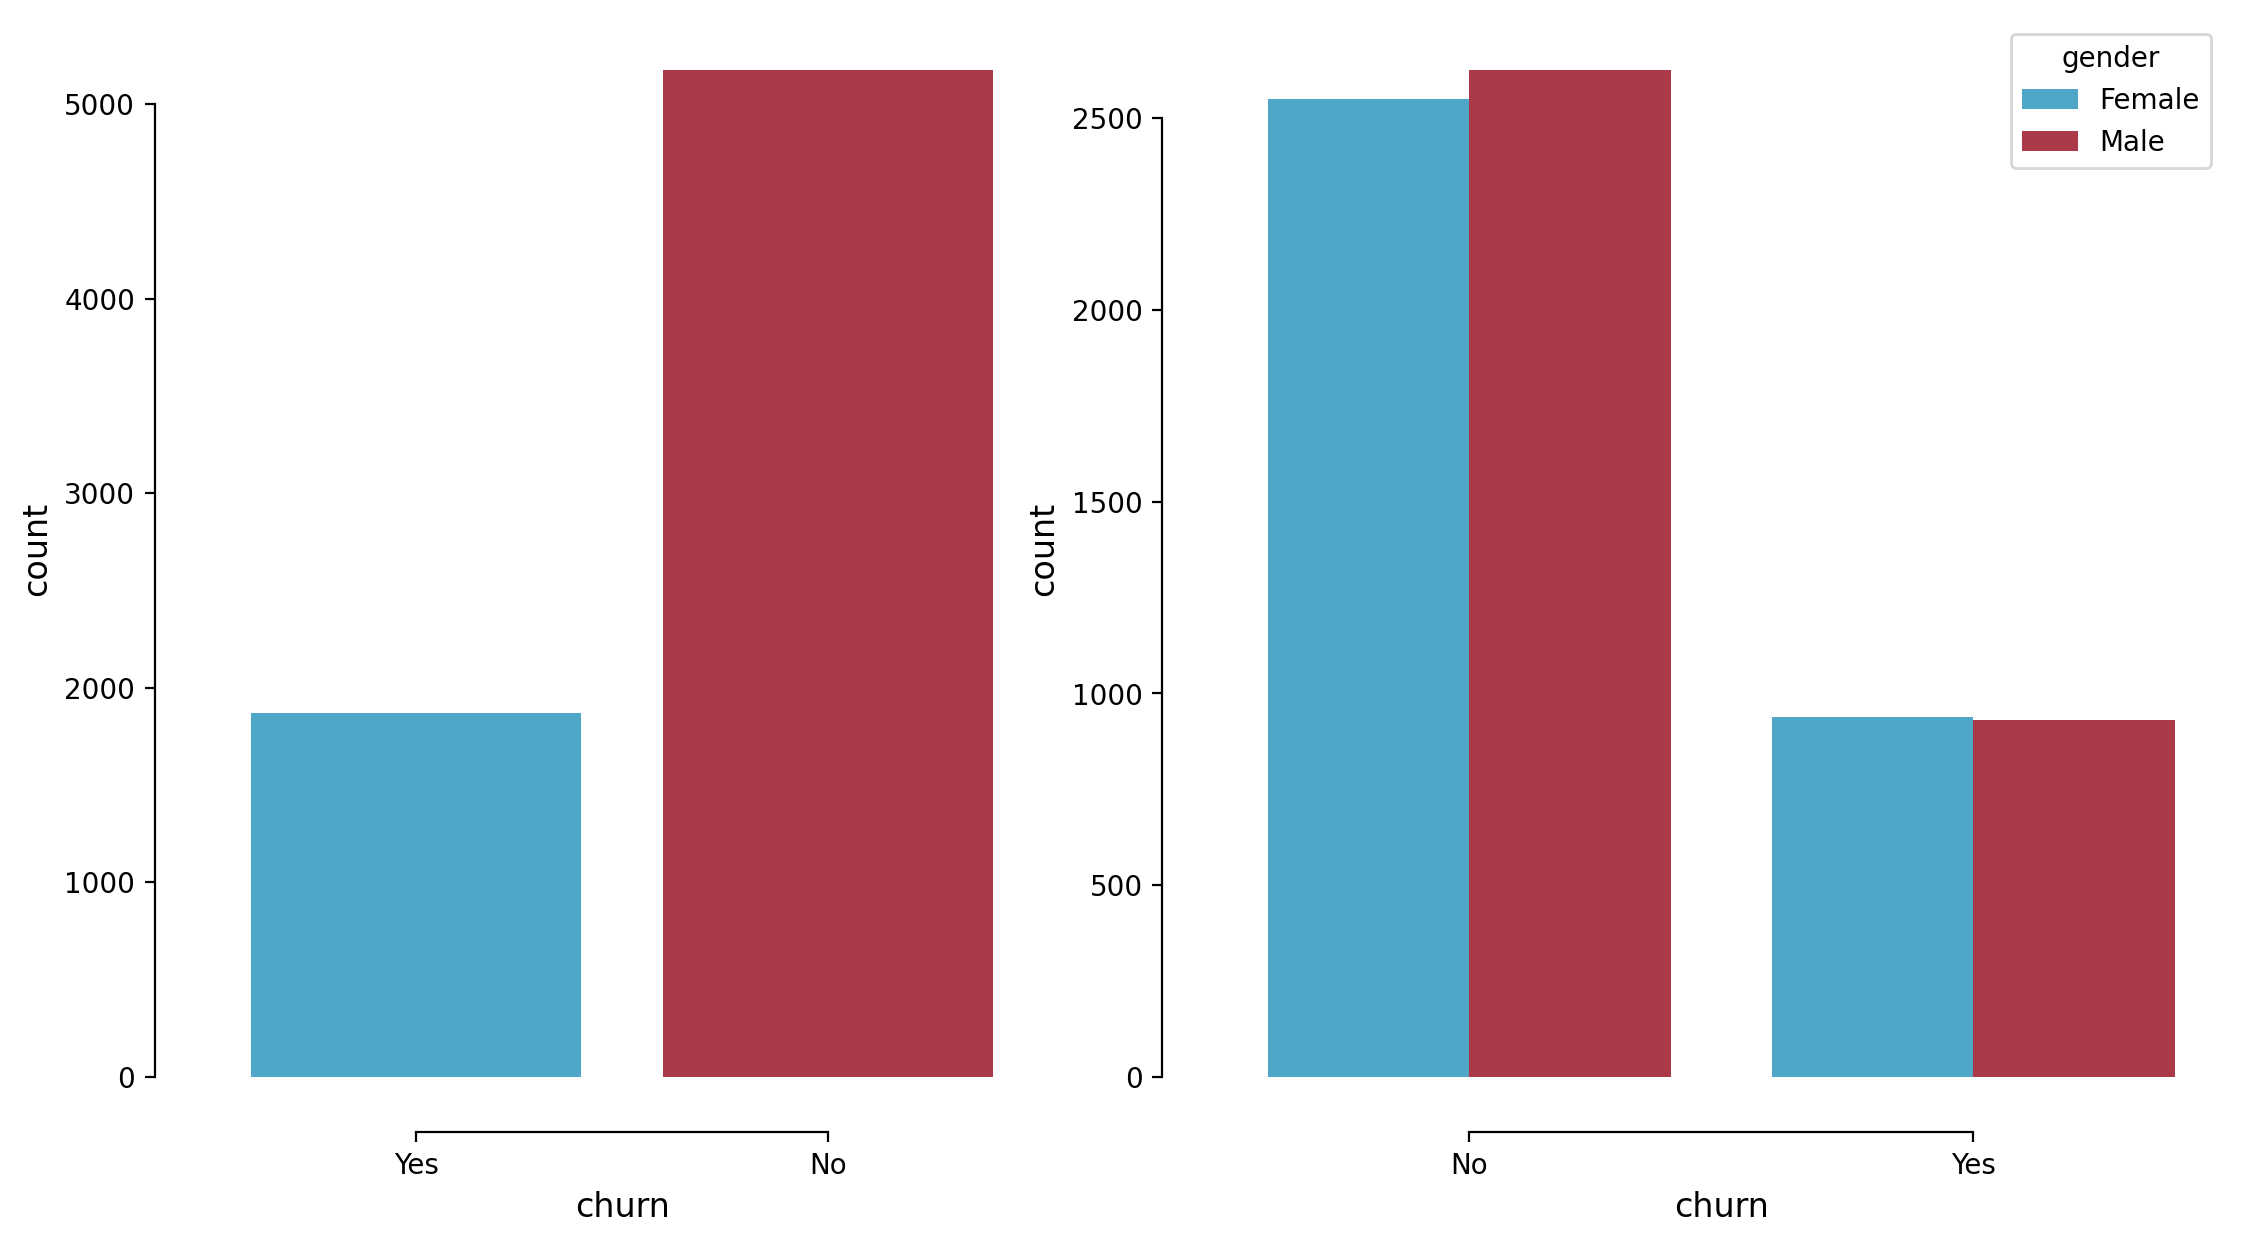

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2,
        figsize=(13,7),gridspec_kw={
            'width_ratios':(0.45,0.55)
        })
ax[0] = sns.countplot(data=df, x='churn',
        palette=colors, order =['Yes','No'],
        ax=ax[0])
ax[1] = sns.countplot(data=df, x='churn',
        hue='gender', palette=colors, ax=ax[1])

sns.despine(offset=20, trim=True)
plt.show()

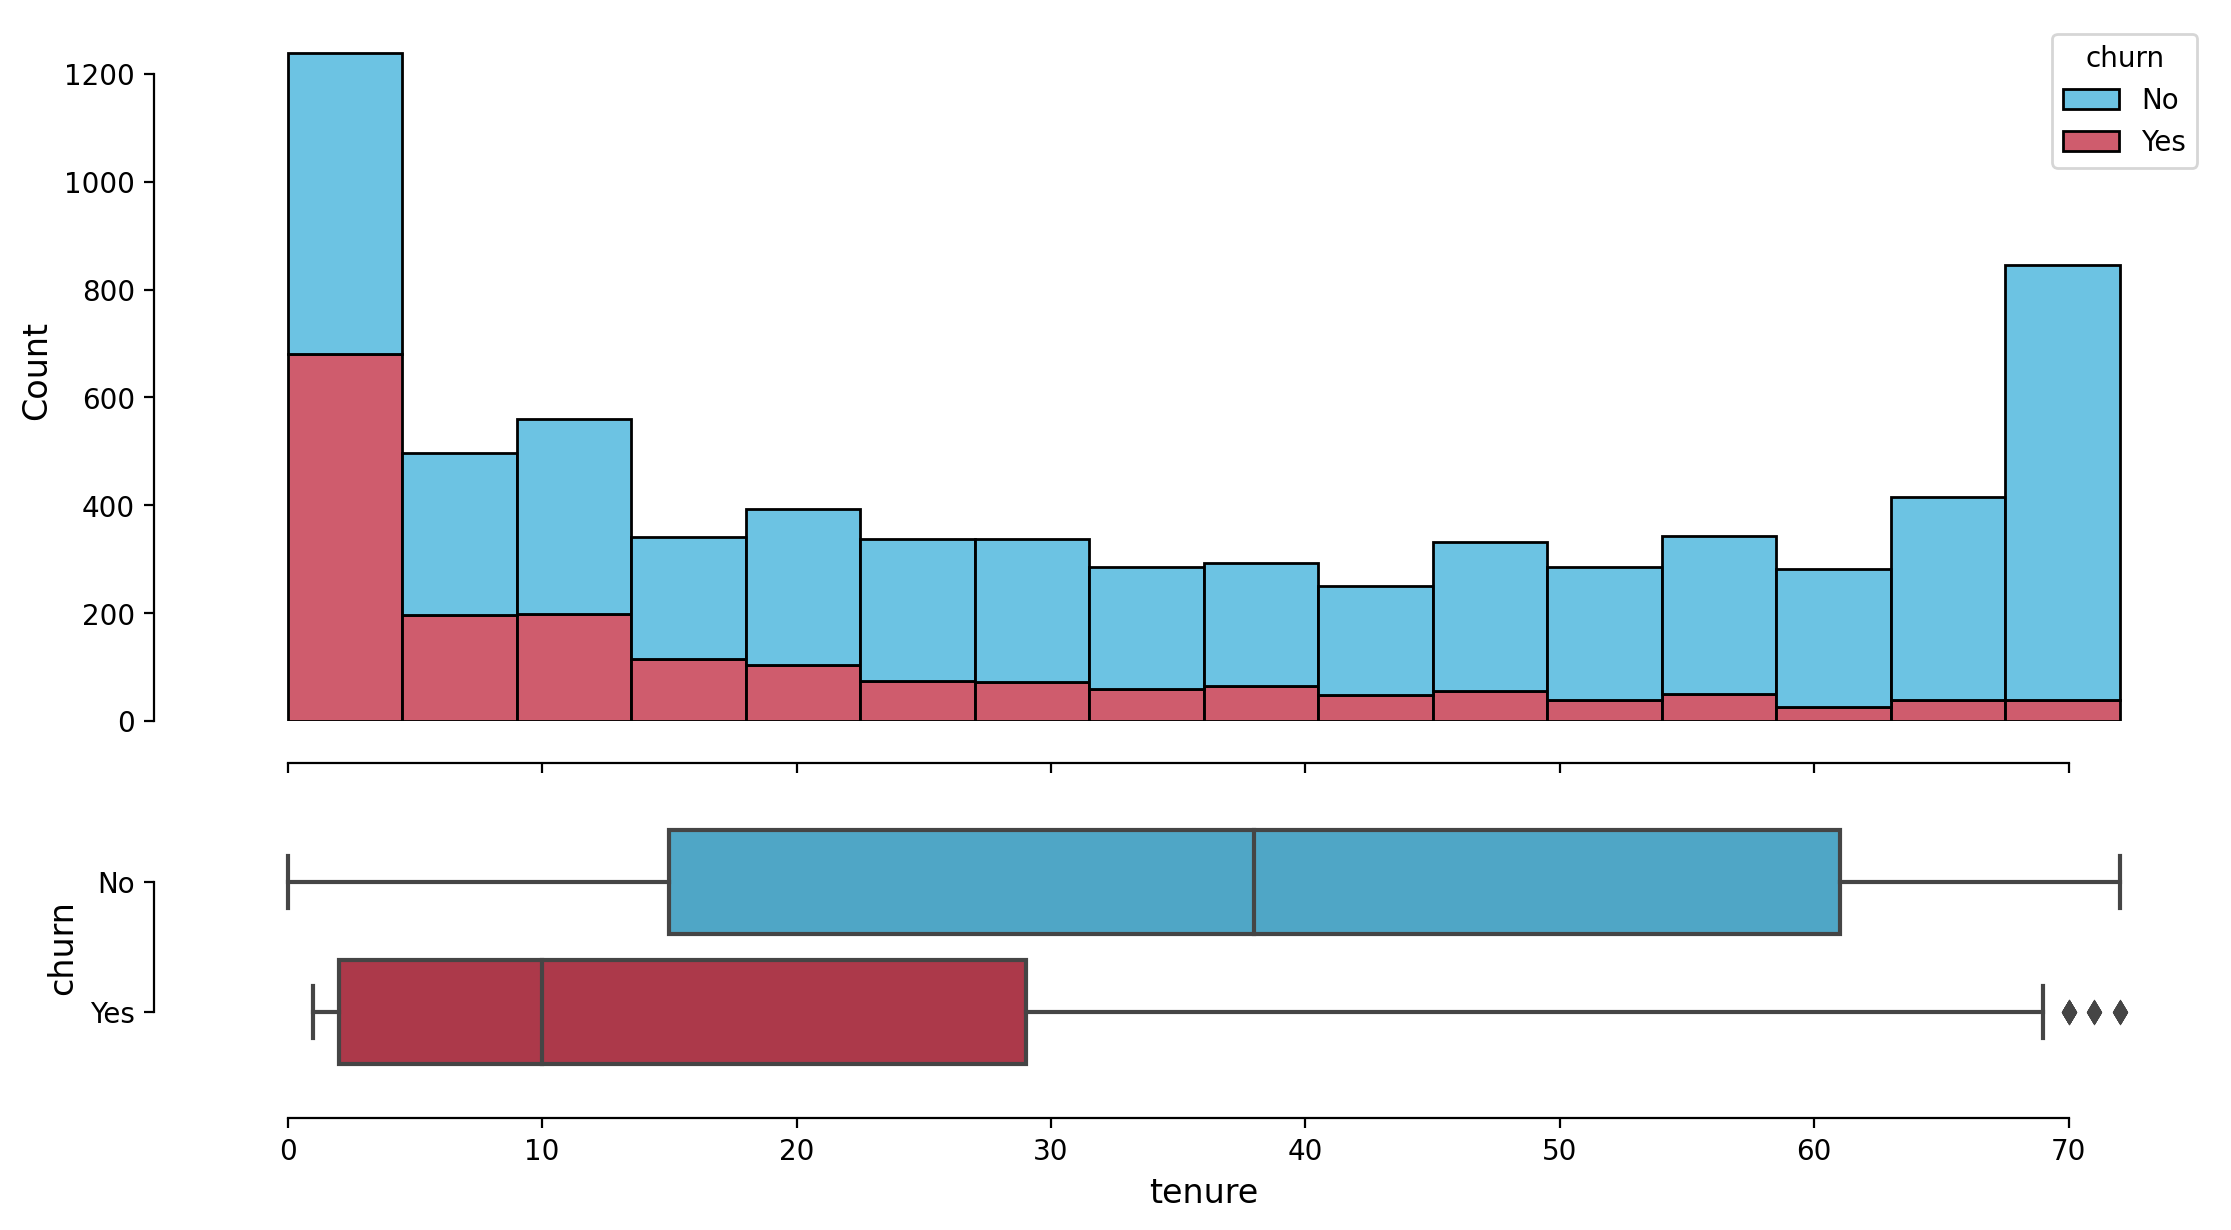

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,
        figsize=(13,7), 
        gridspec_kw={'height_ratios':(0.73, 0.27)})

sns.histplot(data=df, x='tenure', hue='churn',
            palette=colors, multiple='stack',
            hue_order=['No', 'Yes'], ax=ax[0])
sns.boxplot(data=df, x='tenure', y='churn',
            palette=colors, order=['No','Yes'],
            ax=ax[1])
sns.despine(offset=15, trim=True)
plt.show()

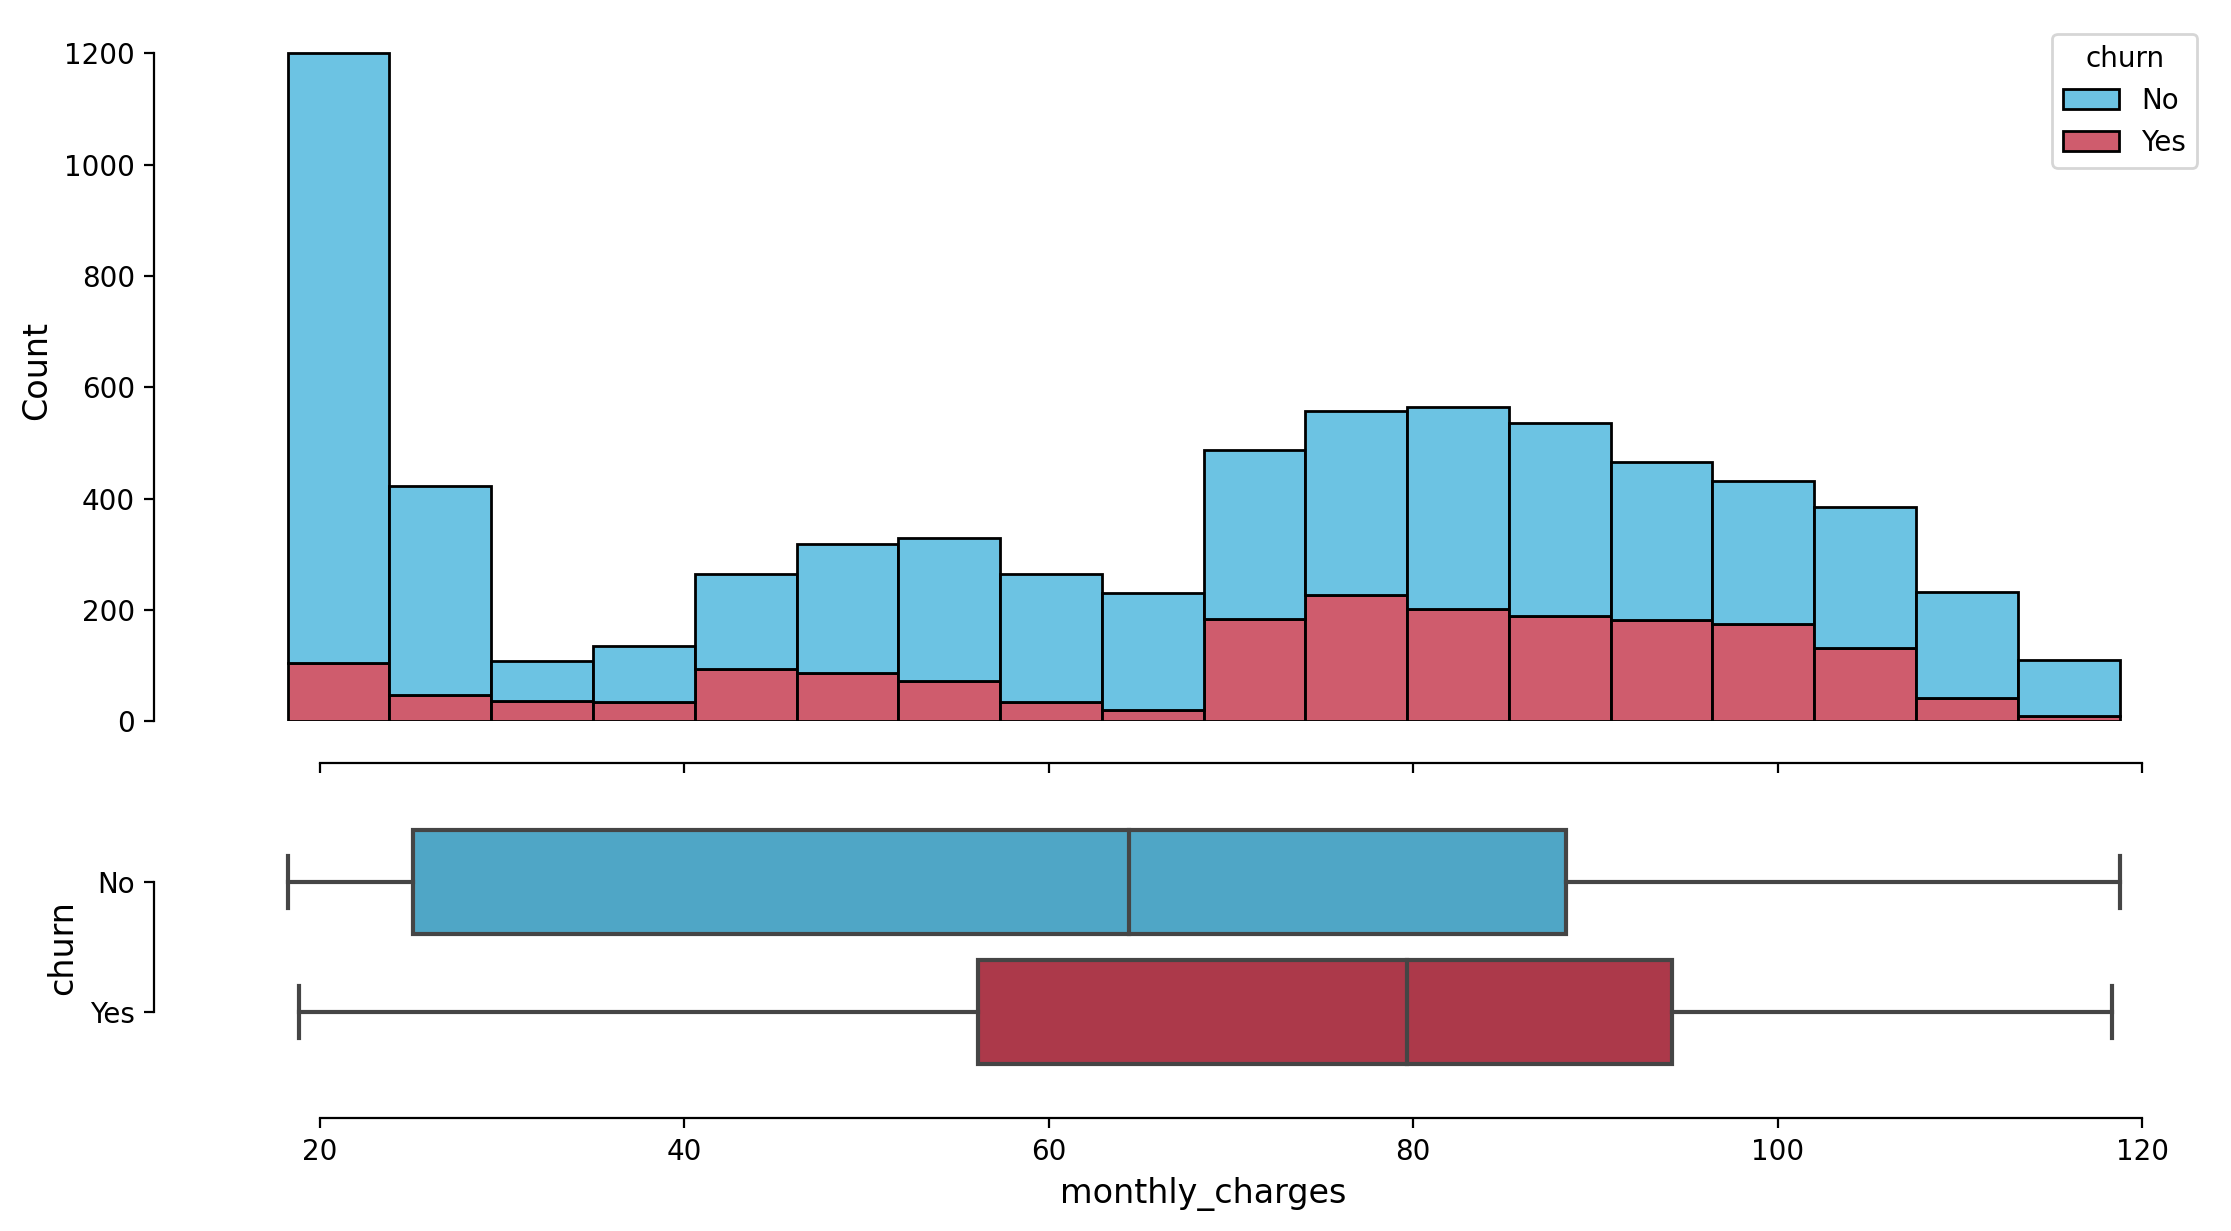

In [92]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,
        figsize=(13,7), 
        gridspec_kw={'height_ratios':(0.73, 0.27)})

sns.histplot(data=df, x='monthly_charges', hue='churn',
            palette=colors, multiple='stack',
            hue_order=['No', 'Yes'], ax=ax[0])
sns.boxplot(data=df, x='monthly_charges', y='churn',
            palette=colors, order=['No','Yes'],
            ax=ax[1])
sns.despine(offset=15, trim=True)
plt.show()

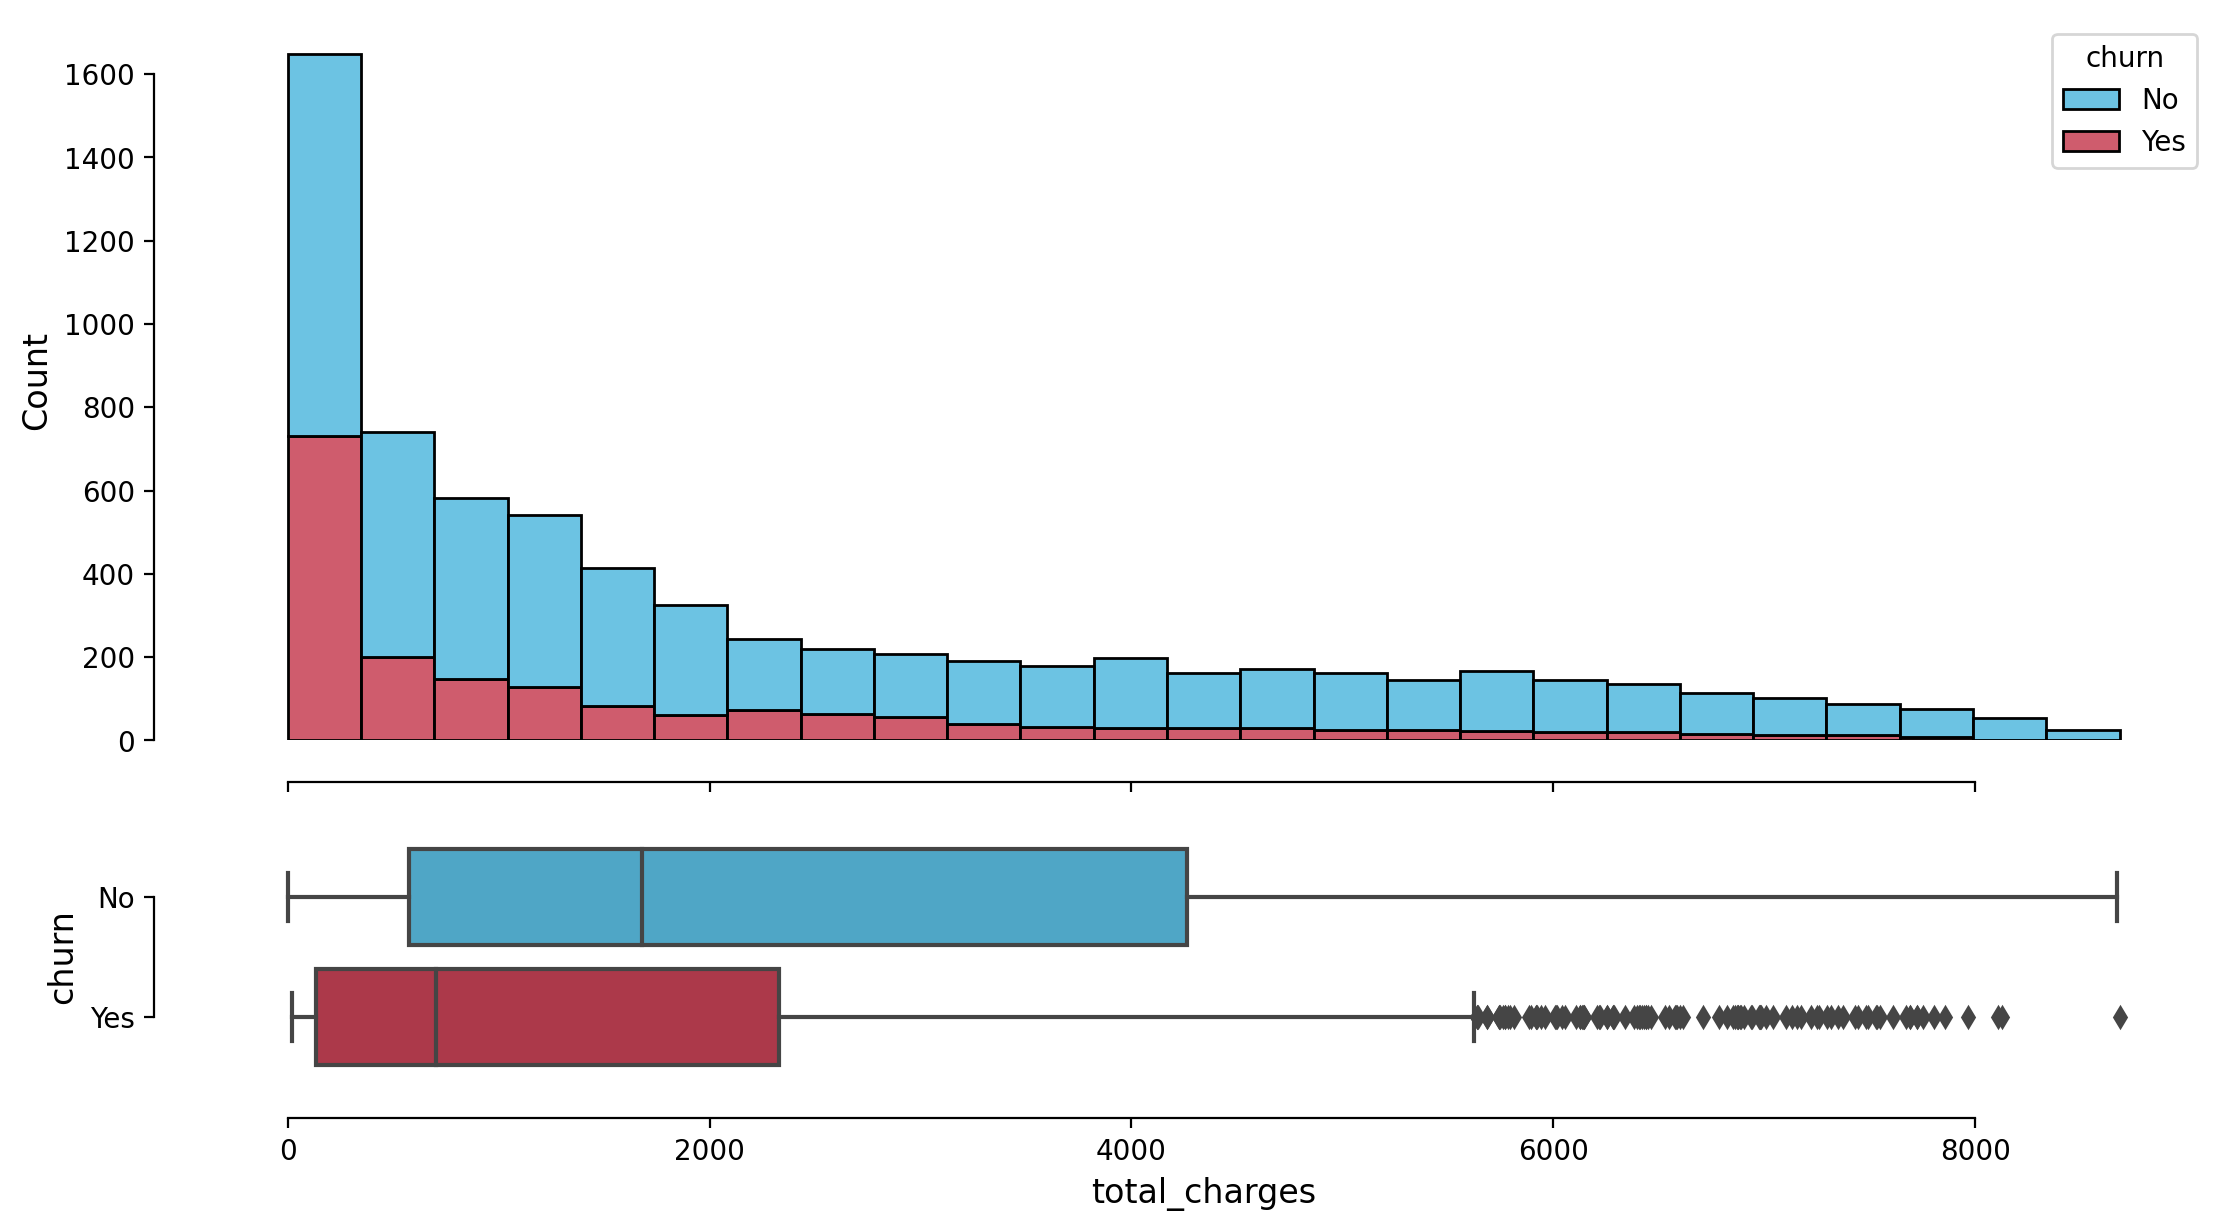

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,
        figsize=(13,7), 
        gridspec_kw={'height_ratios':(0.75, 0.25)})

sns.histplot(data=df, x='total_charges', hue='churn',
            palette=colors, multiple='stack',
            hue_order=['No', 'Yes'], ax=ax[0])
sns.boxplot(data=df, x='total_charges', y='churn',
            palette=colors, order=['No','Yes'],
            ax=ax[1])
sns.despine(offset=15, trim=True)
plt.show()

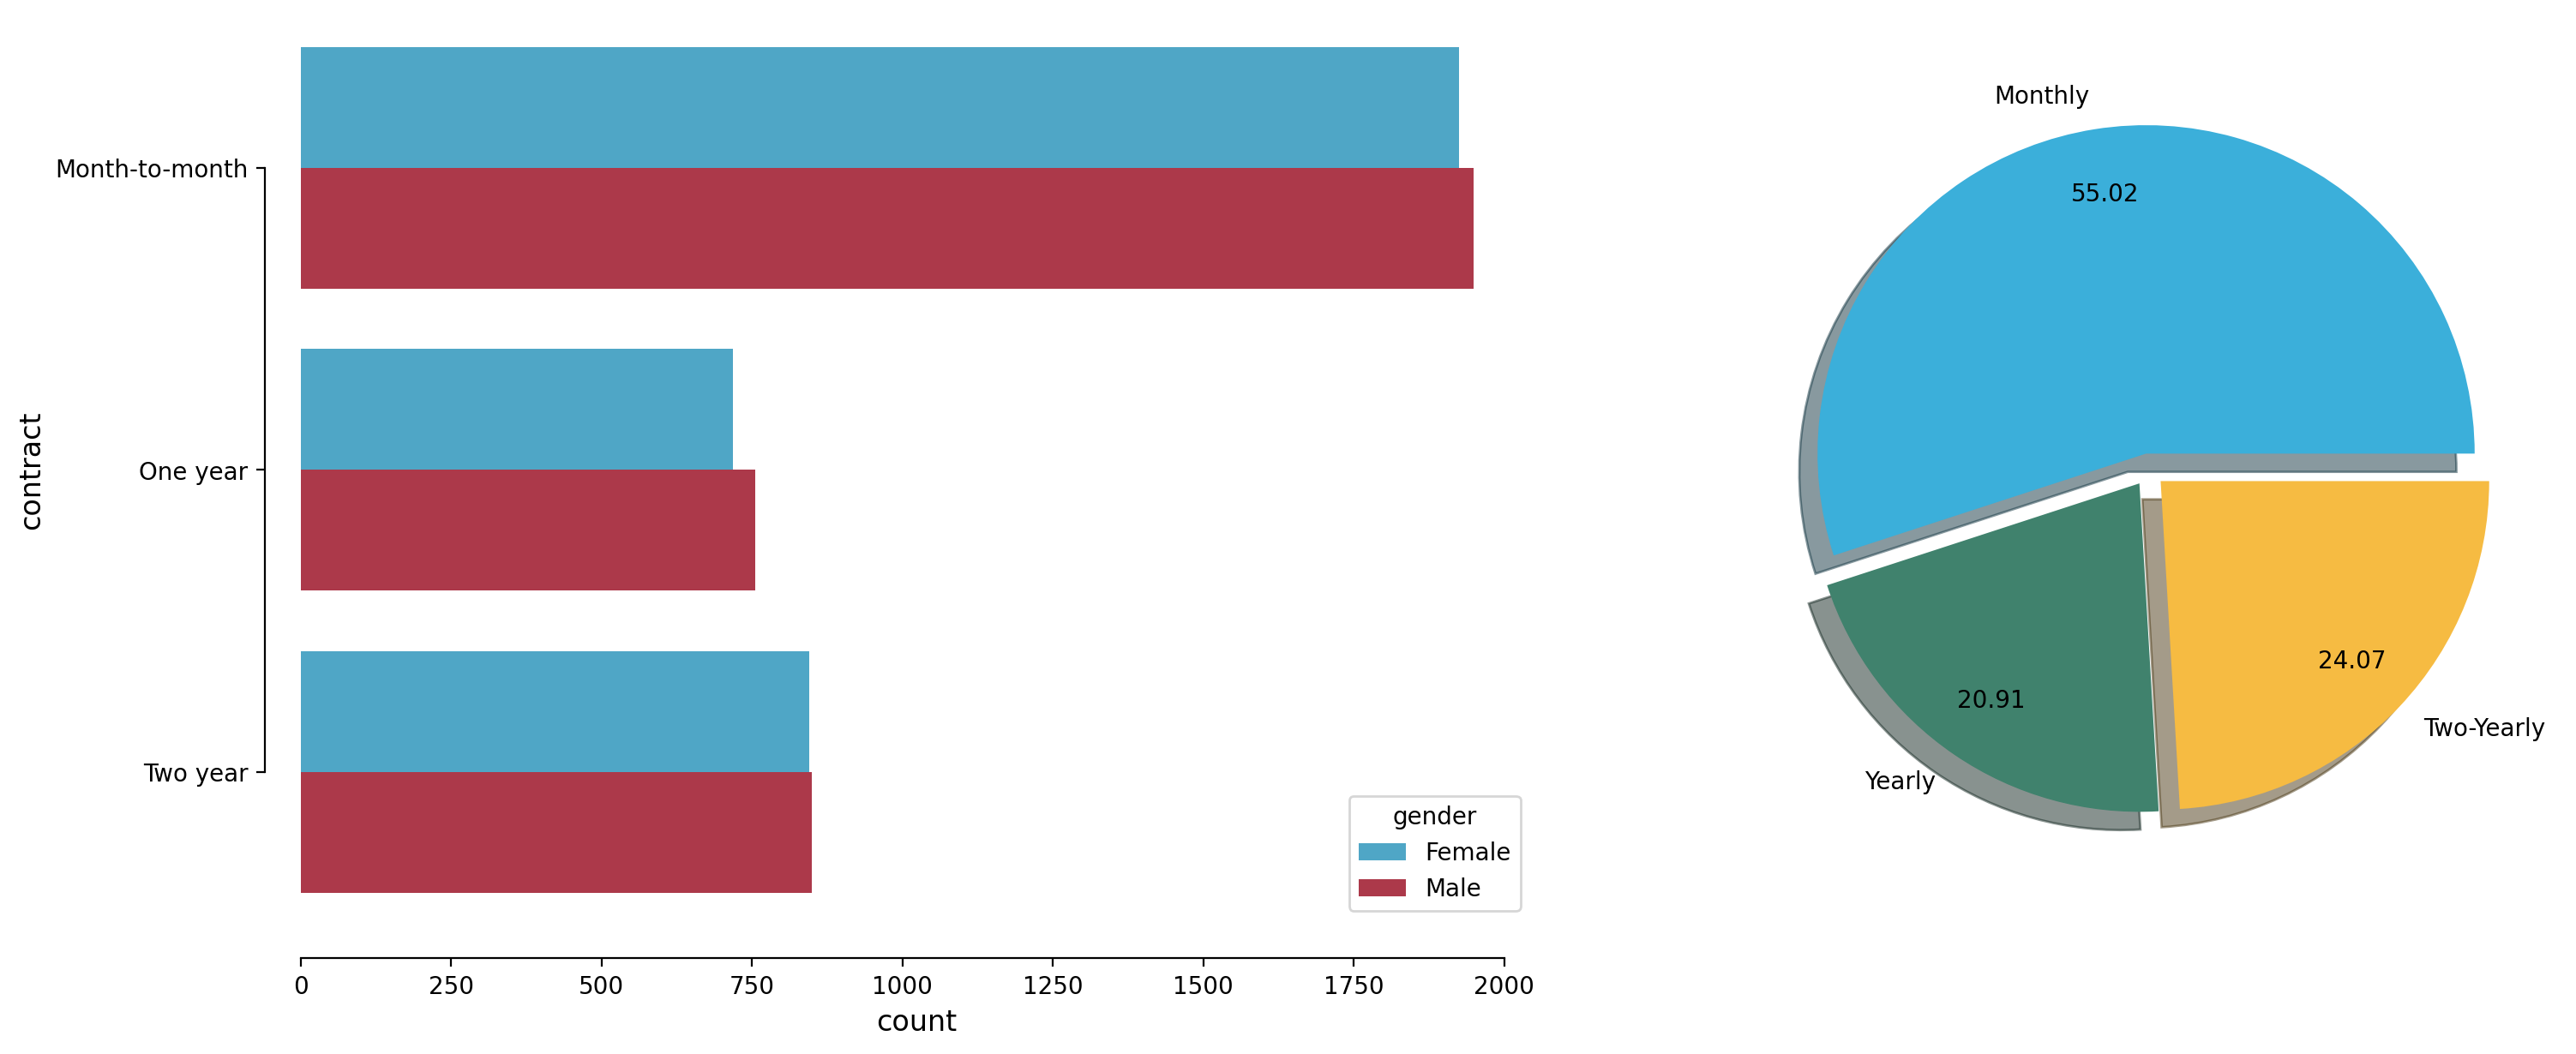

In [94]:
month = df['contract'].value_counts()['Month-to-month']
one_year = df['contract'].value_counts()['One year']
two_year = df['contract'].value_counts()['Two year']

names = ['Monthly', 'Yearly', 'Two-Yearly']
value = [month, one_year, two_year]
fig, ax= plt.subplots(nrows=1,ncols=2, figsize=(17,7), 
                      gridspec_kw={'width_ratios':(.6,.4)})

ax[0] = sns.countplot(data=df, y='contract', hue='gender', ax=ax[0],
                      orient='v',palette=colors)
ax[1].pie(x=value, labels=names, shadow=True,
          autopct='%1.2f', explode=(0.05,0.05,0.05),
          pctdistance=0.8, colors=colors3,
          labeldistance=1.1)
sns.despine(offset=15, trim=True)
plt.show()

In [95]:
churn_encoded = {'No':0, 'Yes':1}
df['churn'] = df['churn'].apply(lambda x: churn_encoded[x])

In [96]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2,
                                          random_state=1)

In [97]:
df_train_full.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
1814,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,0
5946,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,1
3881,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,0


In [98]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33,
                                    random_state=11)


y_train = df_train['churn'].values
y_val = df_val['churn'].values

del df_train['churn']
del df_val['churn']

In [99]:
df_train_full['churn'].value_counts()

0    4113
1    1521
Name: churn, dtype: int64

##### Proportion of churned users:

In [100]:
global_mean = df_train_full['churn'].mean()
print(round(global_mean, 3))

0.27


In [101]:
categorical = ['gender','senior_citizen','partner',
        'dependents','phone_service','multiple_lines',
        'internet_service','online_security','online_backup',
        'device_protection','tech_support','streaming_tv',
        'streaming_tv','streaming_movies','contract',
        'paperless_billing','payment_method']
numrical = ['tenure','monthly_charges','total_charges']

In [102]:
df_train_full[categorical].nunique()

gender               2
senior_citizen       2
partner              2
dependents           2
phone_service        2
multiple_lines       3
internet_service     3
online_security      3
online_backup        3
device_protection    3
tech_support         3
streaming_tv         3
streaming_tv         3
streaming_movies     3
contract             3
paperless_billing    2
payment_method       4
dtype: int64

### Churn Rate:

In [103]:
female_mean = df_train_full[
    df_train_full[
        'gender'
    ]=='Female'
]['churn'].mean()
print(f'Churn rate of female customers:\
\n{(female_mean * 100):.2f}%')

Churn rate of female customers:
27.68%


In [104]:
male_mean = df_train_full[
    df_train_full[
        'gender'
    ]=='Male'
]['churn'].mean()
print(f'Churn rate of male customers:\
\n{(male_mean * 100):.2f}%')

Churn rate of male customers:
26.32%


In [105]:
partner_yes = df_train_full[
    df_train_full[
        'partner'
    ]=='Yes'
]['churn'].mean()
print(f'Churn rate of customers who have partners:\
\n{(partner_yes * 100):.2f}')

Churn rate of customers who have partners:
20.50


In [106]:
partner_no = df_train_full[
    df_train_full[
        'partner'
    ]=='No'
]['churn'].mean()
print(f'Churn rate of customers who dont have partners:\
\n{(partner_no * 100):.2f}')

Churn rate of customers who dont have partners:
32.98


### Risk Ratio:

In [107]:
df_group = df_train_full\
.groupby(by='gender')['churn'].agg(['mean'])

df_group['difference'] = df_group['mean'] - global_mean

df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,difference,risk
gender,,,
Female,0.276824,0.006856,1.025396
Male,0.263214,-0.006755,0.974980


In [108]:
from IPython.display import display

for col in categorical:
    df_group = df_train_full.groupby(by=col)['churn'].agg(['mean'])
    df_group['difference'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean

    display(df_group)

,mean,difference,risk
gender,,,
Female,0.276824,0.006856,1.025396
Male,0.263214,-0.006755,0.974980


,mean,difference,risk
senior_citizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,difference,risk
partner,,,
No,0.329809,0.059841,1.221659
Yes,0.205033,-0.064935,0.759472


,mean,difference,risk
dependents,,,
No,0.313760,0.043792,1.162212
Yes,0.165666,-0.104302,0.613651


,mean,difference,risk
phone_service,,,
No,0.241316,-0.028652,0.893870
Yes,0.273049,0.003081,1.011412


,mean,difference,risk
multiple_lines,,,
No,0.257407,-0.012561,0.953474
No phone service,0.241316,-0.028652,0.893870
Yes,0.290742,0.020773,1.076948


,mean,difference,risk
internet_service,,,
DSL,0.192347,-0.077621,0.712482
Fiber optic,0.425171,0.155203,1.574895
No,0.077805,-0.192163,0.288201


,mean,difference,risk
online_security,,,
No,0.420921,0.150953,1.559152
No internet service,0.077805,-0.192163,0.288201
Yes,0.153226,-0.116742,0.567570


,mean,difference,risk
online_backup,,,
No,0.404323,0.134355,1.497672
No internet service,0.077805,-0.192163,0.288201
Yes,0.217232,-0.052736,0.804660


,mean,difference,risk
device_protection,,,
No,0.395875,0.125907,1.466379
No internet service,0.077805,-0.192163,0.288201
Yes,0.230412,-0.039556,0.853480


,mean,difference,risk
tech_support,,,
No,0.418914,0.148946,1.551717
No internet service,0.077805,-0.192163,0.288201
Yes,0.159926,-0.110042,0.592390


,mean,difference,risk
streaming_tv,,,
No,0.342832,0.072864,1.269897
No internet service,0.077805,-0.192163,0.288201
Yes,0.302723,0.032755,1.121328


,mean,difference,risk
streaming_tv,,,
No,0.342832,0.072864,1.269897
No internet service,0.077805,-0.192163,0.288201
Yes,0.302723,0.032755,1.121328


,mean,difference,risk
streaming_movies,,,
No,0.338906,0.068938,1.255358
No internet service,0.077805,-0.192163,0.288201
Yes,0.307273,0.037305,1.138182


,mean,difference,risk
contract,,,
Month-to-month,0.431701,0.161733,1.599082
One year,0.120573,-0.149395,0.446621
Two year,0.028274,-0.241694,0.104730


,mean,difference,risk
paperless_billing,,,
No,0.172071,-0.097897,0.637375
Yes,0.338151,0.068183,1.252560


,mean,difference,risk
payment_method,,,
Bank transfer (automatic),0.168171,-0.101797,0.622928
Credit card (automatic),0.164339,-0.105630,0.608733
Electronic check,0.455890,0.185922,1.688682
Mailed check,0.193870,-0.076098,0.718121


### Mutual Information:

In [109]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full['churn'])

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
online_security,0.063085
tech_support,0.061032
internet_service,0.055868
online_backup,0.046923
device_protection,0.043453
payment_method,0.043210
streaming_tv,0.031853
streaming_tv,0.031853
streaming_movies,0.031581


In [110]:
df_train_full[numrical]\
.corrwith(df_train_full['churn'])

tenure            -0.351885
monthly_charges    0.196805
total_charges     -0.196353
dtype: float64

- The  correlation  between  tenure  and  churn  is  –0.35:  it  has  a  negative  sign,  so the  longer  customers  stay,  the  less  often  they  tend  to  churn.  For  customers  staying  with  the  company  for  two  months  or  less,  the  churn  rate  is  60%;  for  customers  with  tenure  between  3  and  12  months,  the  churn  rate  is  40%;  and  for customers  staying  longer  than  a  year,  the  churn  rate  is  17%.  So  the  higher  the value  of  tenure,  the  smaller  the  churn  rate .

- monthly_charges  has  a  positive  coefficient  of  0.19,  which  means  that  customers who  pay  more  tend  to  leave  more  often.  Only  8%  of  those  who  pay  less  than  20 dollars monthly  churned;  customers  paying  between  21 dollars and 50 dollars churn  more  frequently  with  a  churn  rate  of  18%;  and  32%  of  people  paying  more  than 50 dollarschurned.

- total_charges  has  a  negative  correlation,  which  makes  sense:  the  longer  people stay  with  the  company,  the  more  they  have  paid  in  total,  so  it’s  less  likely  that they  will  leave.  In  this  case,  we  expect  a  pattern  similar  to  tenure.  For  small  values,  the  churn  rate  is  high;  for  larger  values,  it’s  lower.

# Feature Engineering:

### One Hot Encoding:

In [111]:
train_dict = df_train[categorical + numrical]\
.to_dict(orient='records')
train_dict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

DataFrame columns are not unique, some columns will be omitted.



[{'contract': 'Two year',
  'dependents': 'No',
  'device_protection': 'Yes',
  'gender': 'Male',
  'internet_service': 'DSL',
  'monthly_charges': 86.1,
  'multiple_lines': 'No',
  'online_backup': 'Yes',
  'online_security': 'Yes',
  'paperless_billing': 'Yes',
  'partner': 'Yes',
  'payment_method': 'Bank transfer (automatic)',
  'phone_service': 'Yes',
  'senior_citizen': 0,
  'streaming_movies': 'Yes',
  'streaming_tv': 'Yes',
  'tech_support': 'Yes',
  'tenure': 71,
  'total_charges': 6045.9},
 {'contract': 'One year',
  'dependents': 'No',
  'device_protection': 'Yes',
  'gender': 'Female',
  'internet_service': 'Fiber optic',
  'monthly_charges': 100.5,
  'multiple_lines': 'Yes',
  'online_backup': 'No',
  'online_security': 'No',
  'paperless_billing': 'Yes',
  'partner': 'Yes',
  'payment_method': 'Credit card (automatic)',
  'phone_service': 'Yes',
  'senior_citizen': 1,
  'streaming_movies': 'Yes',
  'streaming_tv': 'Yes',
  'tech_support': 'No',
  'tenure': 60,
  'total_ch

In [112]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [113]:
X_train = dv.transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [114]:
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['contract=Month-to-month',
 'contract=One year',
 'contract=Two year',
 'dependents=No',
 'dependents=Yes',
 'device_protection=No',
 'device_protection=No internet service',
 'device_protection=Yes',
 'gender=Female',
 'gender=Male',
 'internet_service=DSL',
 'internet_service=Fiber optic',
 'internet_service=No',
 'monthly_charges',
 'multiple_lines=No',
 'multiple_lines=No phone service',
 'multiple_lines=Yes',
 'online_backup=No',
 'online_backup=No internet service',
 'online_backup=Yes',
 'online_security=No',
 'online_security=No internet service',
 'online_security=Yes',
 'paperless_billing=No',
 'paperless_billing=Yes',
 'partner=No',
 'partner=Yes',
 'payment_method=Bank transfer (automatic)',
 'payment_method=Credit card (automatic)',
 'payment_method=Electronic check',
 'payment_method=Mailed check',
 'phone_service=No',
 'phone_service=Yes',
 'senior_citizen',
 'streaming_movies=No',
 'streaming_movies=No internet service',
 'streaming_movies=Yes',
 'streaming_tv=No',
 's

# Machine Learning - Classification:

## Logistic Regression:

In [115]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [116]:
val_dict = df_val[categorical + numrical].to_dict(orient='records')
X_val = dv.transform(val_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

DataFrame columns are not unique, some columns will be omitted.



In [117]:
y_pred = model.predict_proba(X_val)
y_pred

array([[0.76508784, 0.23491216],
       [0.73113015, 0.26886985],
       [0.68054704, 0.31945296],
       ...,
       [0.94274614, 0.05725386],
       [0.38476895, 0.61523105],
       [0.93872763, 0.06127237]])

In [118]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.23491216, 0.26886985, 0.31945296, ..., 0.05725386, 0.61523105,
       0.06127237])

In [119]:
y_pred >= 0.5

churn = y_pred >= 0.5

In [120]:
(y_val == churn).mean()

0.8016129032258065

### Model Interpretation

In [121]:
dict(
    zip(dv.get_feature_names(),
        model.coef_[0].round(3)
))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



{'contract=Month-to-month': 0.563,
 'contract=One year': -0.086,
 'contract=Two year': -0.599,
 'dependents=No': -0.03,
 'dependents=Yes': -0.092,
 'device_protection=No': 0.1,
 'device_protection=No internet service': -0.116,
 'device_protection=Yes': -0.106,
 'gender=Female': -0.027,
 'gender=Male': -0.095,
 'internet_service=DSL': -0.323,
 'internet_service=Fiber optic': 0.317,
 'internet_service=No': -0.116,
 'monthly_charges': 0.001,
 'multiple_lines=No': -0.168,
 'multiple_lines=No phone service': 0.127,
 'multiple_lines=Yes': -0.081,
 'online_backup=No': 0.136,
 'online_backup=No internet service': -0.116,
 'online_backup=Yes': -0.142,
 'online_security=No': 0.258,
 'online_security=No internet service': -0.116,
 'online_security=Yes': -0.264,
 'paperless_billing=No': -0.213,
 'paperless_billing=Yes': 0.091,
 'partner=No': -0.048,
 'partner=Yes': -0.074,
 'payment_method=Bank transfer (automatic)': -0.027,
 'payment_method=Credit card (automatic)': -0.136,
 'payment_method=Elect

### Using the Model:

In [122]:
customer = {
    'customer_id':'8879-zkjof',
    'gender': 'Female',
    'senior_citizen': 0,
    'partner':'No',
    'dependents':'No',
    'tenure':41,
    'phone_service':'Yes',
    'multiple_lines':'No',
    'internet_service':'DSL',
    'online_security':'Yes',
    'online_backup':'No',
    'device_protection':'Yes',
    'tech_support':'Yes',
    'streaming_tv':'Yes',
    'streaming_service':'Yes',
    'contract':'One year',
    'paperless_billing':'Yes',
    'payment_method':'Bank transfer (automatic)',
    'monthly_charges': 79.85,
    'total_charges': 3320.75
}

In [123]:
X_test = dv.transform([customer])
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [124]:
model.predict_proba(X_test)

array([[0.93185276, 0.06814724]])

In [125]:
model.predict_proba(X_test)[:,1]

array([0.06814724])

In [126]:
model.predict_proba(X_test)[0,1]

0.06814724010864247

The probability the this customer will churn is only 6.8% which translates to about 7%, which is less than 50% so it would be a good choice to not send this customer a promotional email or coupons.

### Making Another Prediction:

In [127]:
customer = {
    'gender': 'Female',
    'senior_citizen': 1,
    'partner':'No',
    'dependents':'No',
    'phone_service':'Yes',
    'multiple_lines':'Yes',
    'internet_service':'Fiber optic',
    'online_security':'No',
    'online_backup':'No',
    'device_protection':'No',
    'tech_support':'No',
    'streaming_tv':'Yes',
    'streaming_service':'NO',
    'contract':'Month-to-month',
    'paperless_billing':'Yes',
    'payment_method':'Electric Check',
    'monthly_charges': 85.7,
    'total_charges': 85.7
}

In [128]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0,1]

0.8292977017340306

The  output  of  the  model  is  83%  likelihood  of  churn,  so  we  should  send  this  client  a promotional  mail  in  the  hope  of  retaining  them.

# Evaluation Metrics - Classication Model Accuracy:

In [129]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0,1,11)

for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' %(t, acc))
    

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


using the threshold of 0.5 gives us the best accuracy. Typically, 0.5 is a good threshold value to start with, but we should always try other threshold values to make sure 0.5 is the best choice.

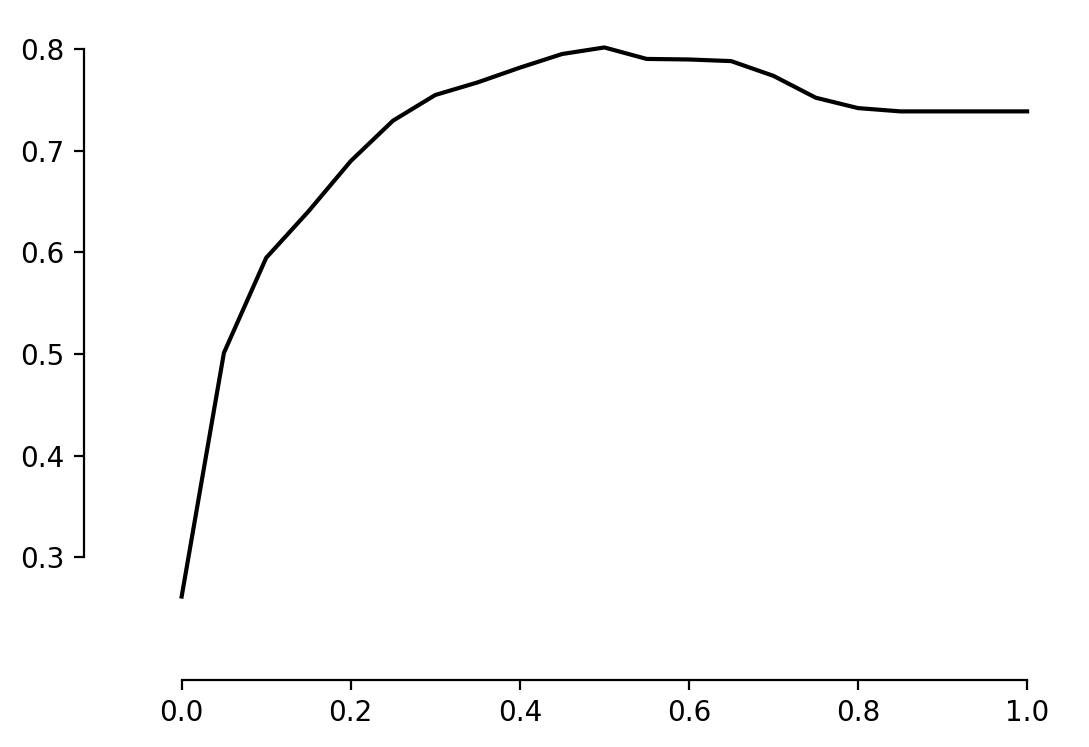

In [130]:
thresholds = np.linspace(0,1,21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >=t)
    accuracies.append(acc)

plt.plot(thresholds, accuracies, c='black')
sns.despine(offset=20, trim=True)

#### Dummy Baseline

In [131]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

accuracy_score(baseline, y_val)

0.7387096774193549

### Confusion Matrix:

In [132]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()


In [133]:
confusion_matrix = np.array(
    [[true_negative, false_positive],
     [false_negative, true_positive]]
)
confusion_matrix

array([[1202,  172],
       [ 197,  289]])

In [134]:
confusion_matrix / confusion_matrix.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

### Precision and Recall:

In [135]:
print(f'Precision = {289/(289+172)*100:.1f}')

Precision = 62.7


In [136]:
print(f'Recall = {289/(289+197)*100:.1f}')

Recall = 59.5


Precision  helps  us  understand  how  many  people  received  a  promotional  message by  mistake.  The  better  the  precision,  the  fewer  false  positives  we  have.  The  precision of  62%  means  that  62%  of  the  reached  customers  indeed  were  going  to  churn  (our true  positives),  whereas  the  remaining  38%  were  not  (false  positives). Recall  helps  us  understand  how  many  of  the  churning  customers  we  failed  to  find. The  better  the  recall,  the  fewer  false  negatives  we  have.  The  recall  of  59%  means  that we reach  only  59%  of  all  churning  users  (true  positives)  and  fail  to  identify  the remaining  41%  (false  negatives). As  we  can  see,  in  both  cases,  we  don’t  really  need  to  know  the  number  of  true  negatives:  even  though  we  can  correctly  identify  them  as  not  churning,  we  aren’t  going  to do  anything  with  them.

## ROC Curve and AUC Score:

In [137]:
print(f'False Positive Rate (FPR) =\
 {172/(1202+172)*100:.1f}')

False Positive Rate (FPR) = 12.5


In [138]:
print(f'True Positive Rate (TPR) =\
 {289/(289+197)*100:.1f}')

True Positive Rate (TPR) = 59.5


## Evaluating Multiple Thresholds:

In [139]:
scores = []
thresholds = np.linspace(0,1,101)
for t in thresholds:
    tp = ((y_pred >= t) & (y_val== 1)).sum()
    fp = ((y_pred >= t) & (y_val== 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['Thresholds', 'TP',
                     'FP', 'FN', 'TN']
df_scores[::10]

,Thresholds,TP,FP,FN,TN
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [140]:
df_scores['TPR'] = df_scores['TP'] / (
    df_scores['TP'] + df_scores['FN']
)

df_scores['FPR'] = df_scores['FP'] / (
    df_scores['FP'] + df_scores['TN']
)
df_scores[::10]

,Thresholds,TP,FP,FN,TN,TPR,FPR
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


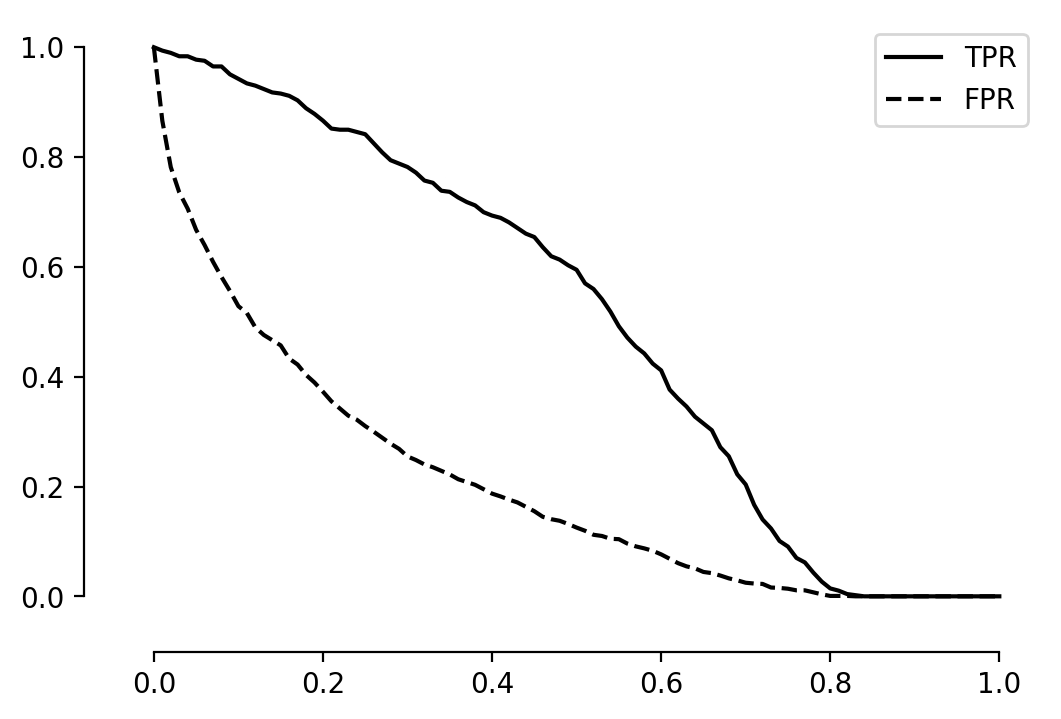

In [141]:
plt.plot(
    df_scores['Thresholds'],
    df_scores['TPR'], label='TPR',
    color='black'
)
plt.plot(
    df_scores['Thresholds'],
    df_scores['FPR'], label='FPR',
    color='black', linestyle='dashed'
)
sns.despine(offset=10, trim=True)
plt.legend()
plt.show()

Both  TPR  and  FPR  start  at  100%  —  at  the  threshold  of  0.0,  we  predict  “churn”  for everyone:

- FPR  is  100%  because  we  have  only  false  positives  in  the  prediction.  There  are no  true  negatives:  nobody  is  predicted  as  non-churning.

- TPR  is  100%  because  we  have  only  true  positives  and  no  false  negatives.

As  the  threshold  grows,  both  metrics  decline  but  at  different  rates. Ideally,  FPR  should  go  down  very  quickly.  A  small  FPR  indicates  that  the  model makes  very  few  mistakes  predicting  negative  examples  (false  positives). 

On  the  other  hand,  TPR  should  go  down  slowly,  ideally  staying  near  100%  all  the  time: that  will  mean  that  the  model  predicts  true  positives  well.

## Random baseline Model:

In [142]:
np.random.seed(1)
y_random = np.random.uniform(0, 1, 
                size=len(y_val))

In [143]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)
    for t in thresholds:
        tp = ((y_pred >= t) & (y_val== 1)).sum()
        fp = ((y_pred >= t) & (y_val== 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['Thresholds', 'TP',
                     'FP', 'FN', 'TN']
        
    df_scores['TPR'] = df_scores['TP'] / (
            df_scores['TP'] + df_scores['FN']
            )
    df_scores['FPR'] = df_scores['FP'] / (
            df_scores['FP'] + df_scores['TN']
            )
        
    return df_scores

In [144]:
df_random = tpr_fpr_dataframe(y_val, y_random)
df_random[::10]

,Thresholds,TP,FP,FN,TN,TPR,FPR
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


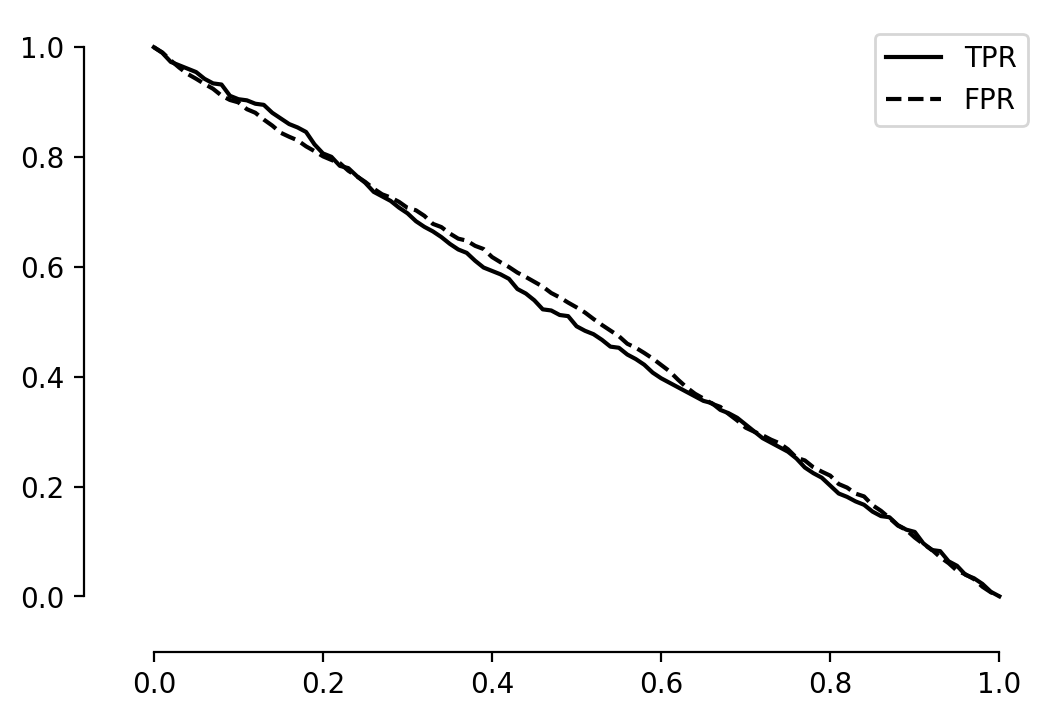

In [145]:
plt.plot(
    df_random['Thresholds'],
    df_random['TPR'], label='TPR',
    color='black'
)
plt.plot(
    df_random['Thresholds'],
    df_random['FPR'], label='FPR',
    color='black', linestyle='dashed'
)
sns.despine(offset=10, trim=True)
plt.legend()
plt.show()

At  the  threshold  of  0.0,  we  treat  everybody  as  churning.  Both  TPR  and  FPR  are  100%: 

- FPR  is  100%  because  we  have  only  false  positives:  all  non-churning  customers are  identified  as  churning. 

- TPR  is  100%  because  we  have  only  true  positives:  we  can  correctly  classify  all churning  customers  as  churning.

As  we  increase  the  threshold,  both  TPR  and  FPR  decrease. At  the  threshold  of  0.4,  the  model  with  a  probability  of  40%  predicts  “non-churn,” and  with  a  probability  of  60%  predicts  “churn.”  Both  TPR  and  FPR  are  60%:

- FPR  is  60%  because  we  incorrectly  classify  60%  of  non-churning  customers  as churning. 
- TPR  is  60%  because  we  correctly  classify  60%  of  churning  customers  as  churning.

Finally,  at  1.0,  both  TPR  and  FPR  are  0%.  At  this  threshold,  we  predict  everybody  as non-churning: 
- FPR  is  0%  because  we  have  no  false  positives:  we  can  correctly  classify  all  nonchurning  customers  as  non-churning.
- TPR is 0% because  we  have  no  true  positives:  all  churning  customers  are  identified  as  non-churning.

## The Ideal Model:

In [146]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1],[num_neg, num_pos])
y_pred_ideal = np.linspace(0 ,1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,Thresholds,TP,FP,FN,TN,TPR,FPR
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,486,1188,0,186,1.000000,0.864629
20,0.2,486,1002,0,372,1.000000,0.729258
30,0.3,486,816,0,558,1.000000,0.593886
40,0.4,486,630,0,744,1.000000,0.458515
50,0.5,486,444,0,930,1.000000,0.323144
60,0.6,486,258,0,1116,1.000000,0.187773
70,0.7,486,72,0,1302,1.000000,0.052402
80,0.8,372,0,114,1374,0.765432,0.000000
90,0.9,186,0,300,1374,0.382716,0.000000


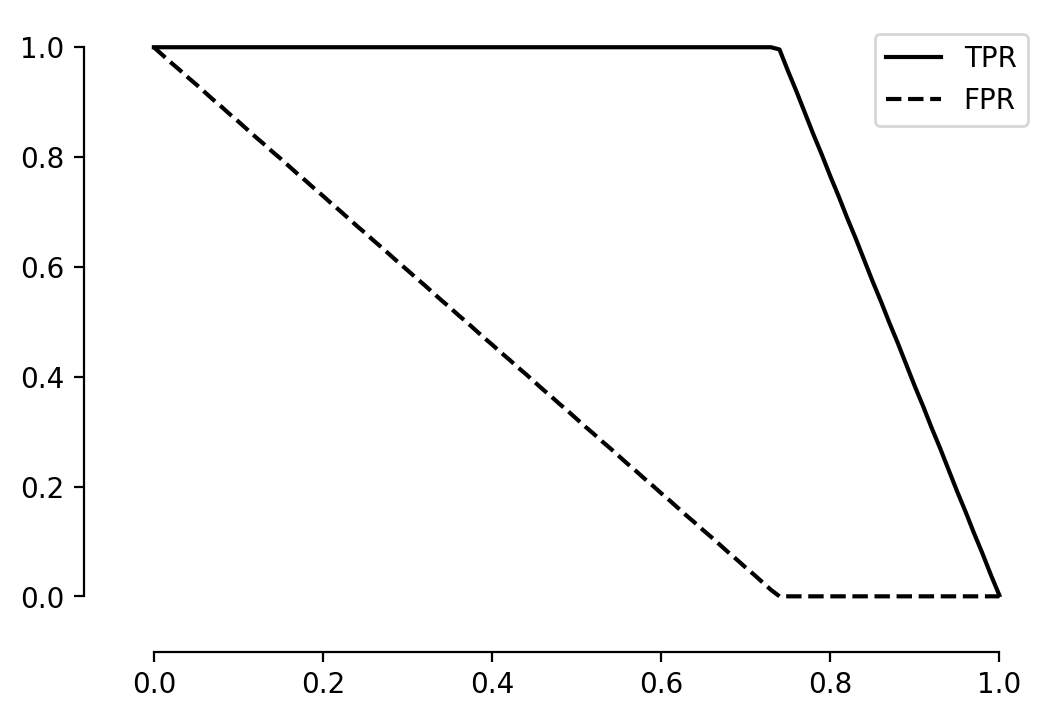

In [147]:
plt.plot(
    df_ideal['Thresholds'],
    df_ideal['TPR'], label='TPR',
    color='black'
)
plt.plot(
    df_ideal['Thresholds'],
    df_ideal['FPR'], label='FPR',
    color='black', linestyle='dashed'
)
sns.despine(offset=10, trim=True)
plt.legend()
plt.show()

- Both  TPR  and  FPR  start  at  100%  and  end  at  0%. 
- For thresholds  lower  than  0.74,  we  always  correctly  classify  all  churning  customers as  churning;  that’s  why  TRP  stays  at  100%.  On  the  other  hand,  we  incorrectly  classify  some  non-churning  ones  as  churning  —  those  are  our  false  positives.  As  we increase  the  threshold,  fewer  and  fewer  non-churning  customers  are  classified as  churning,  so  FPR  goes  down.  At  0.6,  we  misclassify  258  non-churning  customers  as  churning.
- The threshold  of  0.74  is  the  ideal  situation:  all  churning  customers  are  classified as  churning,  and  all  non-churning  are  classified  as  non-churning;  that’s  why TPR  is  100%  and  FPR  is  0%.
- Between  0.74  and  1.0,  we  always  correctly  classify  all  non-churning  customers, so  FPR  stays  at  0%.  However,  as  we  increase  the  threshold,  we  start  incorrectly classifying  more  and  more  churning  customers  as  non-churning,  so  TPR  goes down.  At  0.8,  114  out  of  446  churning  customers  are  incorrectly  classified as non-churning.  Only  372  predictictions  are  correct,  so  TPR  is  76%

## ROC Curve:

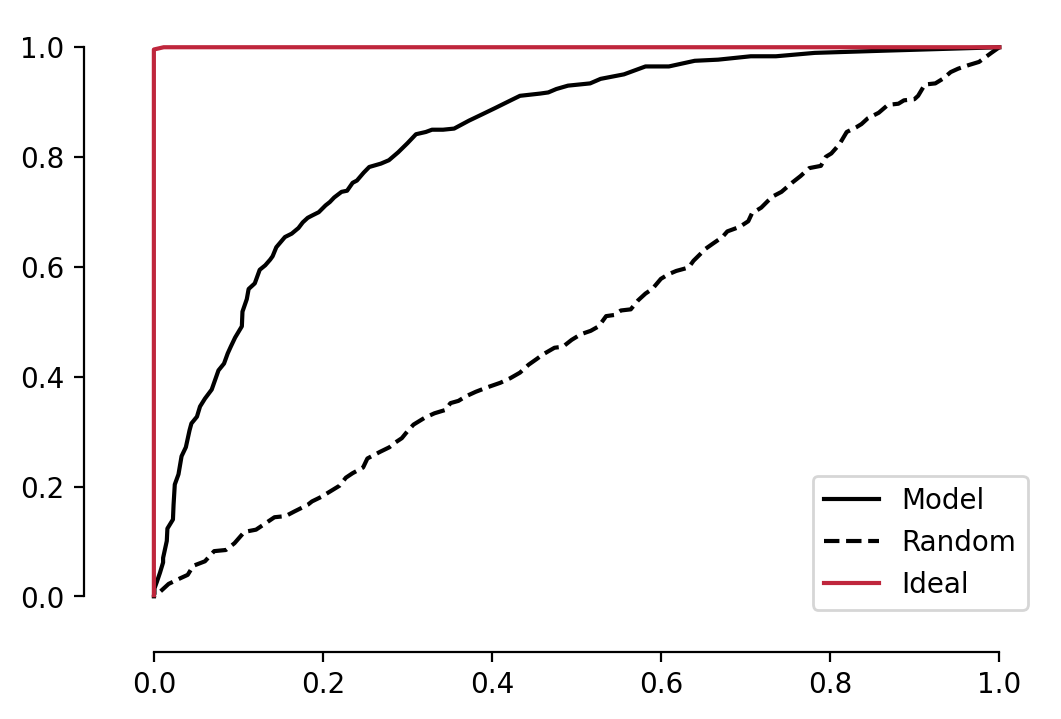

In [148]:
plt.plot(df_scores['FPR'], 
         df_scores['TPR'],
         label='Model', color='black')
plt.plot(df_random['FPR'],
         df_random['TPR'],
         label='Random', color='black', 
         linestyle='dashed')
plt.plot(df_ideal['FPR'],
         df_ideal['TPR'],
         label='Ideal', color='#bf263c')
sns.despine(offset=10, trim=True)
plt.legend()
plt.show()

When  we  plot  it,  we  can  see  that  the ROC curve  of  the  random  classifier  is  an  approximately  straight  line  from  bottom  left to  top  right.  For  the  ideal  model,  however,  the  curve  first  goes  up  until  it  reaches 100%  TPR,  and  from  there  it  goes  right  until  it  reaches  100%  FPR.

Our  models  should  always  be  somewhere  between  these  two  curves.  We  want  our model  to  be  as  close  to  the  ideal  curve  as  possible  and  as  far  as  possible  from  the  random  curve. 

The  ROC  curve  of  a  random  model  serves  as  a  good  visual  baseline  —  when  we add  it  to  the  plot,  it  helps  us  to  judge  how  far  our  model  is  from  this  baseline  —  so  it’s a  good  idea  to  always  include  this  line  in  the  plot.

However,  we  don’t  really  need  to  generate  a  random  model  each  time  we  want  to have  an  ROC curve:  we  know what  it  looks  like,  so  we  can  simply  include  a  straight  line from  (0,  0)  to  (1,  1)  in  the  plot.  

As  for  the  ideal  model,  we  know  that  it  always  goes  up  to  (0,  1)  and  then  goes  right to  (1,  1).  The  top-left  corner  is  called  the  “ideal  spot”:  it’s  the  point  when  the  ideal model  gets  100%  TPR  and  0%  FPR.  We  want  our  models  to  get  as  close  to  the  ideal spot  as  possible. 

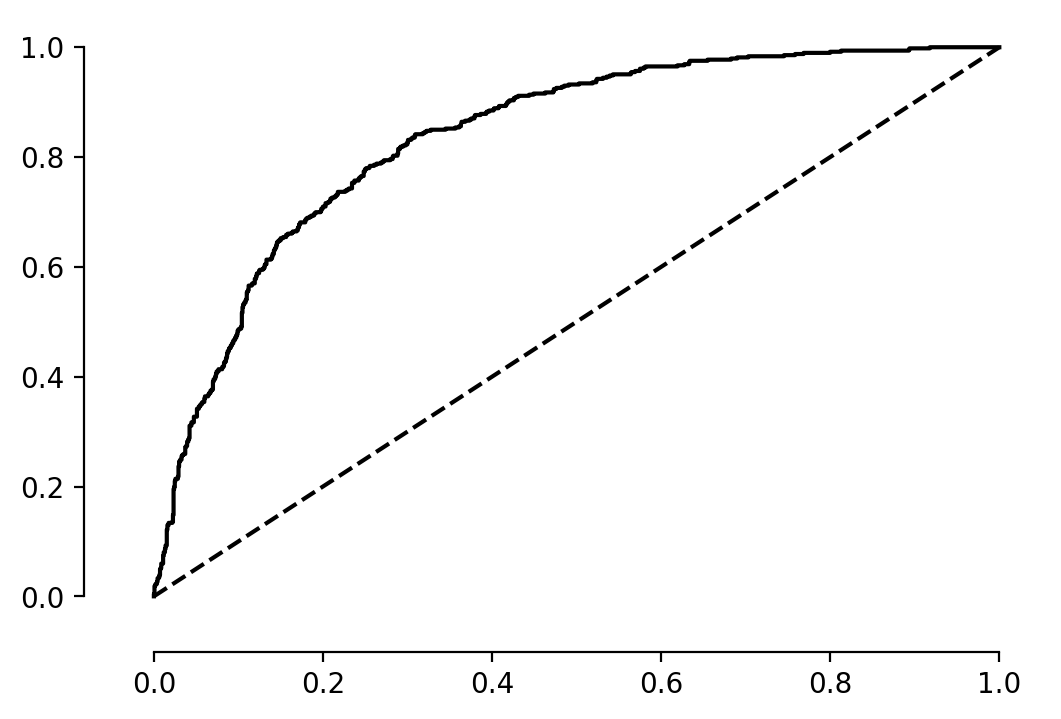

In [149]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr, color='black')
plt.plot([0,1], [0,1], color='black',
         linestyle='dashed')
sns.despine(offset=10, trim=True)
plt.show()

### Area Under the ROC Curve:

In [150]:
from sklearn.metrics import auc

auc(df_scores['FPR'], df_scores['TPR'])

0.8359001084215382

In [151]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val,y_pred)

0.8363366398907399

Suppose  we  randomly  pick  a  customer  that  we  know  churned  and  a  customer  who didn’t  and  then  apply  the  model  to  these  customers  and  see  what  the  score  is  for  each. We  want  the  model  to  score  the  churning  customer  higher  than  the  non-churning one.  AUC  tells  us  the  probability  of  that  happening:  it’s  the  probability  that  the  score of  a  randomly  selected  churning  customer  is  higher  than  the  score  of  a  randomly selected  non-churning  one. We can  verify  this.  If  we  do  this  experiment  10,000  times  and  then  count  how  many times  the  score  of  the  positive  example  was  higher  than  the  score  of  the  negative  one, the  percentage  of  cases  when  it’s  true  should  roughly  correspond  to  the  AUC